> __《学术训练与职业伦理工作坊》“文本挖掘”专题__



- 罗晨
    - 武汉大学新闻与传播学院讲师
    - 邮箱：chenluo@whu.edu.cn


- 2022年10月28日09:50 - 12:15

- 核心文献：Roberts, M. E., Stewart, B. M., & Tingley, D. (2019). stm: An R Package for Structural Topic Models. *Journal of Statistical Software*, *91*(2). https://doi.org/10.18637/jss.v091.i02


- STM的核心优势：使主题建模具备了假设检验的可能性，文档层面的元数据（document-level metadata）可以带入主题的推断过程中


- 两个推断因变量：文档-主题关系（document-topic relationship）、主题-词语关系（topic-word relationship）


- 分析流程

<img src="./stm_process.png" width=400 align="middle">

### 1. 安装必要的包

In [1]:
# install.packages("stm")

also installing the dependencies ‘iterators’, ‘ISOcodes’, ‘foreach’, ‘shape’, ‘RcppEigen’, ‘fastmatch’, ‘RcppParallel’, ‘SnowballC’, ‘stopwords’, ‘data.table’, ‘glmnet’, ‘lda’, ‘matrixStats’, ‘quadprog’, ‘quanteda’, ‘slam’, ‘RcppArmadillo’





The downloaded binary packages are in
	/var/folders/z_/6b8f_9vs5cn5hx3_jlxf0jq80000gn/T//Rtmpdr1Un7/downloaded_packages


In [9]:
install.packages("tm")

also installing the dependencies ‘NLP’, ‘BH’





  There is a binary version available but the source version is later:
   binary source needs_compilation
tm  0.7-8  0.7-9              TRUE


The downloaded binary packages are in
	/var/folders/z_/6b8f_9vs5cn5hx3_jlxf0jq80000gn/T//Rtmpdr1Un7/downloaded_packages


installing the source package ‘tm’




### 2. 引入包

In [2]:
require(stm)
# 另一种引入写法
# library(stm)

Loading required package: stm

stm v1.3.6 successfully loaded. See ?stm for help. 
 Papers, resources, and other materials at structuraltopicmodel.com



### 3. 引入数据

In [4]:
data <- read.csv("./data/stm_data.csv")
head(data, 5)

,content,sender,words
,<chr>,<chr>,<chr>
1,北京公布2月18日新发新冠肺炎确诊病例活动过的小区或场所 http://t.cn/A6h0lufr,普通用户,北京 公布 活动 小区 场所
2,#全国性哀悼活动# [蜡烛]有些人的挚爱却永远留在了这个冬天。深切哀悼抗击新冠肺炎疫情斗争牺牲烈士和逝世同胞。,普通用户,全国性 哀悼 活动 蜡烛 挚爱 留在 深切 哀悼 抗击 斗争 牺牲 烈士 逝世 同胞
3,清明时节心情凝，探望长空思绪浓。忧怀自古英烈魂，更为新冠泪湿巾。天灾人祸举国哀，十亿龙人泪满怀。悠祭同胞英魂去，感念往事痛心哉！呜呼一声长悲叹，满眼泪花缕尘埃！哀哉心疼难回首，一把素花献祭台。呜呼哀哉又悲叹，万盏灯炷照往来！贫道高龙道人武清阳含泪祭拜！稽手了！,普通用户,清明 时节 心情 探望 长空 思绪 忧怀 英烈 湿巾 举国 龙人 满怀 同胞 英魂 感念 往事 痛心 悲叹 泪花 尘埃 哀哉 心疼 回首 素花 献祭 悲叹 贫道 高龙 道人 武清 含泪 祭拜 稽手
4,截至4月26日18时，全球新冠肺炎疫情形势,普通用户,全球 形势
5,#唐山确诊首例新型肺炎病例#坐标河北省唐山市迁安市沙河驿镇红庙子村，我们村开始给家家户户消毒了[good],普通用户,唐山 首例 坐标 河北省 唐山市 迁安市 沙河 驿镇 红庙子 家家户户 消毒


In [5]:
tail(data, 5)

,content,sender,words
,<chr>,<chr>,<chr>
1981,#美国出现首例新冠肺炎死亡病例# 你们说没有的 是忘记山东大学 陪读的事情了吗,认证个人,首例 死亡病例 忘记 山东大学 陪读 事情
1982,#中国以外确诊病例超230万#【世卫组织：#中国以外新冠确诊病例达2312966#例】世界卫生组织21日公布的最新数据显示，中国以外新冠确诊病例达到2312966例。❤️6岁小朋友创作沙画为中国加油❤️为祖国祝福[爱心][爱心][爱心] 沙画师李嘉航的微博视频,认证个人,世卫 组织 世界卫生组织 公布 数据 小朋友 创作 沙画 加油 祖国 祝福 爱心 爱心 爱心 画师 李嘉航
1983,这期#Ricki在忙啥# 聊新冠对球鞋行业的影响。和国内疫情得到有效控制不同，国外的新冠疫情大有愈演愈烈的趋势。深受全球化影响的球鞋行业，也因为疫情情况的变化而有了新的走向。原本有多个市场分担压力的国际品牌瞬间遭遇崩盘，而以国内为主的国产品牌却迎来生机。#运动品牌在忙啥# http://t.cn/A6Z0JvTP,认证个人,球鞋 行业 影响 控制 趋势 深受 全球化 影响 球鞋 行业 情况 变化 走向 原本 市场 分担 压力 国际品牌 遭遇 崩盘 国产品牌 迎来 生机 运动 品牌
1984,#金贤重[超话]# 各位henecia 10年老龄粉 想在此提醒各位 为表达全国各族人民对抗击新冠肺炎疫情斗争牺牲烈士、逝世同胞的深切哀悼，四月四日全国将进行全国性哀悼，禁娱一日。 各位henecia请务必谨言慎行，勿带话题发微博 静默、追思，缅怀逝者，致敬英雄！,认证个人,金贤 超话 老龄 提醒 表达 全国 抗击 斗争 牺牲 烈士 逝世 同胞 深切 哀悼 全国 全国性 哀悼 禁娱 话题 发微 静默 追思 缅怀 逝者 致敬 英雄
1985,#新冠肺炎传播途径包括气溶胶传播#不是，这个意思是要么央视在造谣，要么是微信在造谣咯？ 赣州 显示地图,认证个人,传播 途径 包括 气溶胶 传播 造谣 微信 造谣 赣州


In [6]:
# 查看数据维数
dim(data)

[1] 1985    3

### 4. 对数据的初步处理

In [7]:
# 善用说明
# 函数功能：对文本进行基础的转换，是对tm组件的一个封装
?textProcessor

In [10]:
processed <- textProcessor(data$words, # 待处理的文本列
                           metadata = data, # 包含所有内容的元数据
                           lowercase = F, # 需要进行小写转换吗？
                           removestopwords = F, # 需要移除停用词吗？
                           removepunctuation = F, # 需要移除标点吗？
                           removenumbers = F, # 需要移除数字吗？
                           stem = F, # 需要抽取词干吗？
                           wordLengths = c(1, Inf), # 词语长度设定，最短长度为1
                           language = "na", # 需要指定语种吗？
                           verbose = T # 需要查看处理进程吗？
                          )

Building corpus... 
Creating Output... 


### 5. 正式分析语料准备


- `document`：类似于Bag of Words，包含词语的索引和出现的频数


- `vocab`：包含词语和对应的索引


- `metadata`：包含文档层面的变量（如：作者身份、文本发布时间等）

In [11]:
# 对文档进行操作，包括移除不符合条件的词语，重新编制词语索引
?prepDocuments

In [12]:
out <- prepDocuments(processed$documents, 
                     processed$vocab, 
                     processed$meta, 
                     lower.thresh = 1)

Removing 7413 of 11547 terms (7413 of 34994 tokens) due to frequency 
Removing 4 Documents with No Words 
Your corpus now has 1981 documents, 4134 terms and 27581 tokens.

In [13]:
# 不同阈值设定下被移除的文档数量
?plotRemoved

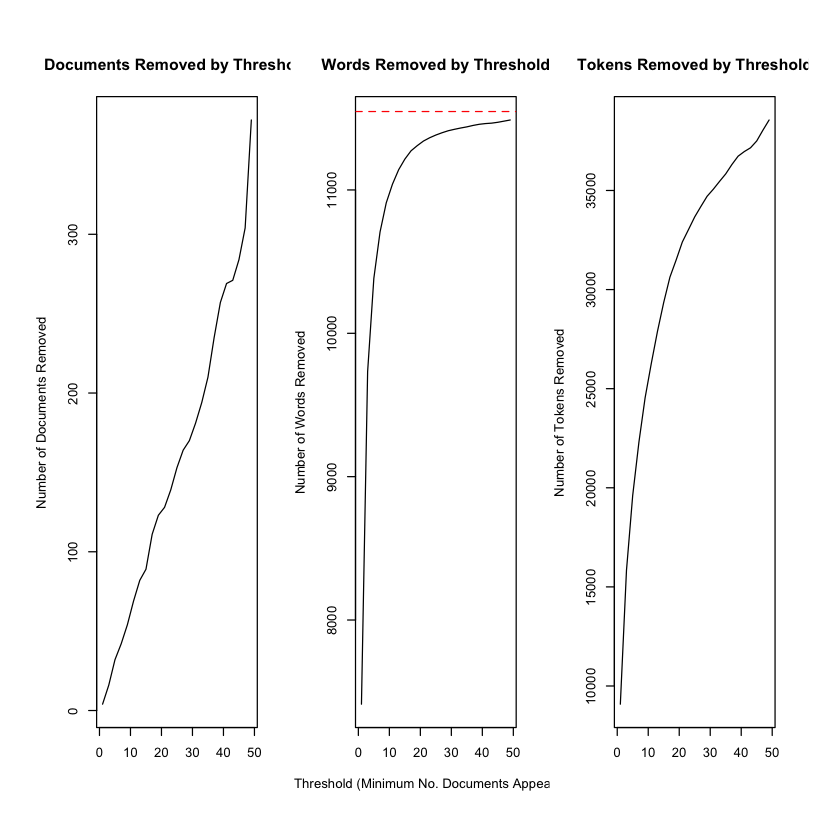

In [14]:
plotRemoved(processed$documents, 
            lower.thresh = seq(1, 50, 2))

In [15]:
# 将正式待分析语料中的要素赋值给新的变量
docs <- out$documents
vocab <- out$vocab
meta <- out$meta

### 6. 选择合适的主题数量

In [16]:
# 运用数据驱动的方式来衡量不同主题数量下的模型质量
?searchK

In [17]:
set.seed(1028)
kResult <- searchK(docs, 
                   vocab, 
                   data = meta, 
                   K = c(2, 3, 4, 5, 6), # 备择主题数
                   init.type = "Spectral", # 建模初始化方式
                   prevalence = ~sender, # 带入主题推断过程中的协变量，可以是连续/离散型
                   cores = 4, # 调用的内核数量
                   verbose = F)

Using multiple-cores.  Progress will not be shown. 


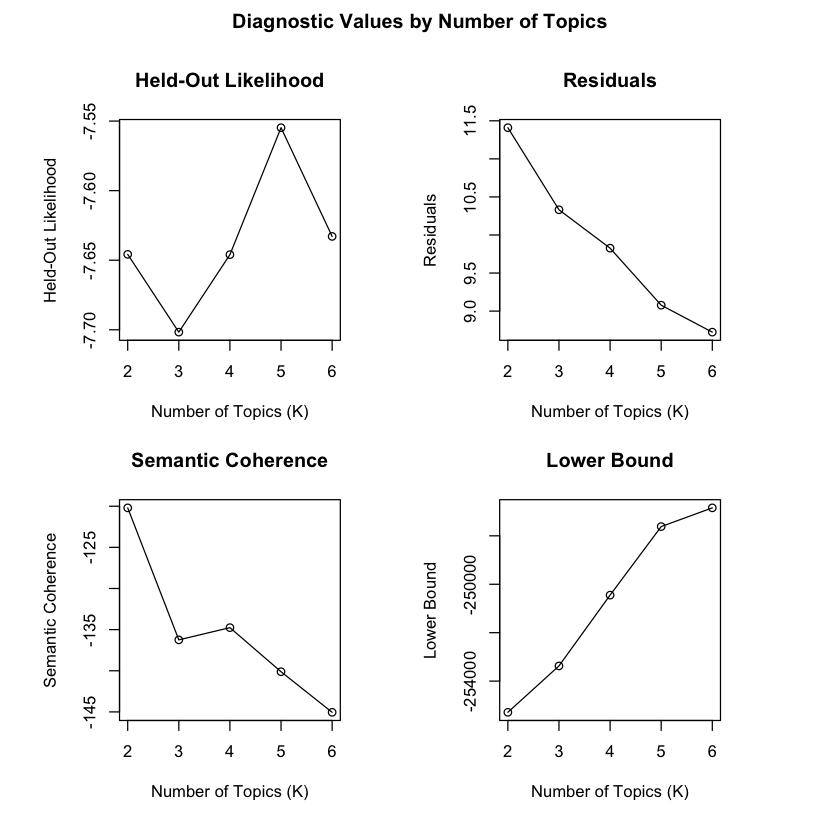

In [18]:
# 可视化以上结果
# Held-out likelihood：越高越好
# Residuals：越低越好
# Semantic coherence：越高越好
# Lower bound：越低越好
plot(kResult)

### 7. 正式建模

In [22]:
?stm

In [21]:
final_model <- stm(docs, 
                   vocab, 
                   data = meta, 
                   K = 5, 
                   init.type = "Spectral", 
                   prevalence = ~sender, 
                   verbose = F, 
                   seed = 20221028)

In [23]:
# 查看主题对应关键词的函数
?labelTopics

In [24]:
labelTopics(final_model, 
            n = 10) # 展示的关键词数量

Topic 1 Top Words:
 	 Highest Prob: 新增, 医院, 累计, 死亡, 医生, 意大利, 治疗, 出院, 人数, 报告 
 	 FREX: 新增, 累计, 医生, 意大利, 出院, 治愈, 累计确诊, 丁香, 境外输入, 无症状感染者 
 	 Lift: 中医药, 中华, 中南, 中国籍, 中国香港, 亚马逊, 亟待, 人口密度, 今天下午, 会诊 
 	 Score: 出院, 新增, 累计, 丁香, 治愈, 无症状感染者, 境外输入, 密切接触者, 医学观察, 危重 
Topic 2 Top Words:
 	 Highest Prob: 病毒, 检测, 传播, 阳性, 疫苗, 关注, 戴口罩, 去世, 发现, 出门 
 	 FREX: 疫苗, 戴口罩, 去世, 抗体, 战胜, 费解, 新冠疫苗, 动物, 临床试验, 传染 
 	 Lift: 上市公司, 上街, 专访, 东京都, 买家, 乱世, 乱跑, 事发, 人性, 伊拉克 
 	 Score: 病毒, 检测, 抗体, 戴口罩, 费解, 临床试验, 疫苗, 传播, 阳性, 老虎 
Topic 3 Top Words:
 	 Highest Prob: 抗击, 特朗普, 全球, 国家, 组织, 同胞, 哀悼, 超话, 英国, 牺牲 
 	 FREX: 抗击, 特朗普, 同胞, 哀悼, 牺牲, 世卫, 烈士, 总统, 逝世, 英雄 
 	 Lift: 下跌, 不易, 世卫, 中东, 中华文明, 中小企业, 主持, 主持人, 举动, 书画 
 	 Score: 抗击, 烈士, 哀悼, 特朗普, 逝世, 牺牲, 蜡烛, 互助, 世卫, 斗争 
Topic 4 Top Words:
 	 Highest Prob: 工作, 影响, 时间, 疫情防控, 措施, 韩国, 人类, 做好, 人员, 防控 
 	 FREX: 韩国, 人类, 做好, 允悲, 通知, 担心, 球员, 二哈, 比赛, 取消 
 	 Lift: 上空, 专栏, 丧失, 个体, 事故, 低估, 体育迷, 作出, 儿童, 充分发挥 
 	 Score: 球员, 考试, 高炉, 球队, 韩国, 联赛, 领导小组, 人类, 比赛, 复赛 
Topic 5 Top Words:
 	 Highest Prob: 武汉, 全国, 加油

### 8. 针对不同协变量条件下主题偏好的假设检验

In [26]:
# 核心的回归函数
?estimateEffect

In [27]:
estat  <- estimateEffect(1:5 ~ sender,
                         final_model, 
                         metadata = meta)

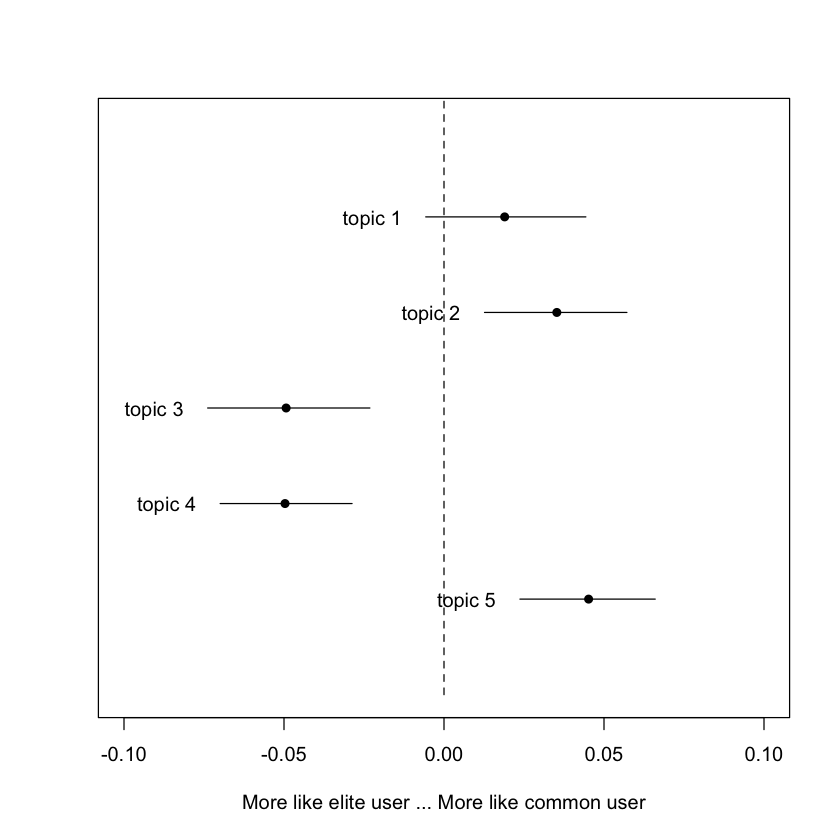

In [28]:
# 可视化假设检验结果
plot(estat, 
     covariate = "sender", # 协变量
     topics = seq(1, 5, 1), # DV：每一则主题
     model = final_model, 
     method = "difference", # 估计方法：针对主题偏好的差分方法，类似于t-test
     cov.value1 = "普通用户", # 分类变量-第一类别
     cov.value2 = "认证个人", # 分类变量-第二类别
     xlab = "More like elite user ... More like common user", # X轴标签，需要注意先写value2，后写value1
     xlim = c(-.1, .1), # X轴范围
     labeltype = "custom", # 标签设定方式
     custom.labels = paste("topic", 1:5, sep=" ")) # 自定义标签格式

In [29]:
# 查看具体的回归系数
summary(estat, 
        topics = seq(1, 5))


Call:
estimateEffect(formula = 1:5 ~ sender, stmobj = final_model, 
    metadata = meta)


Topic 1:

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)     0.215504   0.009042  23.834   <2e-16 ***
sender认证个人 -0.018689   0.012429  -1.504    0.133    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Topic 2:

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)     0.207621   0.007348  28.255  < 2e-16 ***
sender认证个人 -0.035084   0.011329  -3.097  0.00198 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Topic 3:

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    0.184053   0.009415  19.548  < 2e-16 ***
sender认证个人 0.049213   0.012829   3.836 0.000129 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Topic 4:

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    0.152695   0.007291  20.942  < 2e-16